In [1]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.cm import ScalarMappable
import plotly.graph_objects as go


import warnings 
warnings.filterwarnings('ignore')

# File to Load 
layoffs_file = Path("Resources/layoffs.csv")

# Read Layoffs file and store into Pandas DataFrames
layoffs_data = pd.read_csv(layoffs_file)
layoffs_data_df = layoffs_data

# Display the data table for preview
display(layoffs_data_df)


,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,FlightStats,Portland,Travel,73.0,NaN,2024-05-30,Acquired,United States,3.0
1,Walnut,New York City,Sales,15.0,0.20,2024-05-29,Series B,United States,56.0
2,Fisker,Los Angeles,Transportation,NaN,NaN,2024-05-29,Post-IPO,United States,1700.0
3,Lucid Motors,SF Bay Area,Transportation,400.0,0.06,2024-05-24,Post-IPO,United States,8300.0
4,Foursquare,New York City,Marketing,105.0,0.25,2024-05-23,Series G,United States,390.0
...,...,...,...,...,...,...,...,...,...
3620,Service,Los Angeles,Travel,NaN,1.00,2020-03-16,Seed,United States,5.1
3621,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13,Unknown,United States,45.0
3622,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,Seed,United States,1.0
3623,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03-12,Series C,United States,90.0


In [2]:
# General information about the Dataframe
layoffs_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3625 entries, 0 to 3624
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              3625 non-null   object 
 1   location             3624 non-null   object 
 2   industry             3624 non-null   object 
 3   total_laid_off       2377 non-null   float64
 4   percentage_laid_off  2331 non-null   float64
 5   date                 3625 non-null   object 
 6   stage                3618 non-null   object 
 7   country              3625 non-null   object 
 8   funds_raised         3236 non-null   float64
dtypes: float64(3), object(6)
memory usage: 255.0+ KB


In [3]:
# Checking if there is any empty value
layoffs_data_df.isna().sum()

company                   0
location                  1
industry                  1
total_laid_off         1248
percentage_laid_off    1294
date                      0
stage                     7
country                   0
funds_raised            389
dtype: int64

In [4]:
# ------------- Clean data --------------

# Fixing missing values
layoffs_data_df["total_laid_off"] = layoffs_data_df["total_laid_off"].fillna(0)
layoffs_data_df["percentage_laid_off"] = layoffs_data_df["percentage_laid_off"].fillna(0)
layoffs_data_df["funds_raised"] = layoffs_data_df["funds_raised"].fillna(0)

# Converting date to mm/yyyy
layoffs_data_df['date'] = pd.to_datetime(layoffs_data_df['date']).dt.strftime('%Y-%m')

# Selecting only the data where the total number of layoffs is different from zero 0
layoffs_data_df = layoffs_data_df[layoffs_data_df["total_laid_off"] != 0]
 

display(layoffs_data_df)


,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,FlightStats,Portland,Travel,73.0,0.00,2024-05,Acquired,United States,3.0
1,Walnut,New York City,Sales,15.0,0.20,2024-05,Series B,United States,56.0
3,Lucid Motors,SF Bay Area,Transportation,400.0,0.06,2024-05,Post-IPO,United States,8300.0
4,Foursquare,New York City,Marketing,105.0,0.25,2024-05,Series G,United States,390.0
5,Guild,Denver,Education,300.0,0.25,2024-05,Series F,United States,643.0
...,...,...,...,...,...,...,...,...,...
3619,Help.com,Austin,Support,16.0,1.00,2020-03,Seed,United States,6.0
3621,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03,Unknown,United States,45.0
3622,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03,Seed,United States,1.0
3623,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03,Series C,United States,90.0


In [5]:
#  Select only the United States
usa_layoffs_df = layoffs_data_df[(layoffs_data_df["country"] == "United States")]

display(usa_layoffs_df)

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,FlightStats,Portland,Travel,73.0,0.00,2024-05,Acquired,United States,3.0
1,Walnut,New York City,Sales,15.0,0.20,2024-05,Series B,United States,56.0
3,Lucid Motors,SF Bay Area,Transportation,400.0,0.06,2024-05,Post-IPO,United States,8300.0
4,Foursquare,New York City,Marketing,105.0,0.25,2024-05,Series G,United States,390.0
5,Guild,Denver,Education,300.0,0.25,2024-05,Series F,United States,643.0
...,...,...,...,...,...,...,...,...,...
3619,Help.com,Austin,Support,16.0,1.00,2020-03,Seed,United States,6.0
3621,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03,Unknown,United States,45.0
3622,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03,Seed,United States,1.0
3623,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03,Series C,United States,90.0


In [6]:
# Total of layoffs per industry in USA

usa_lay_industry = usa_layoffs_df.groupby('industry')["total_laid_off"].sum()

# Converting data to int
usa_lay_industry = usa_lay_industry.astype(int)

# Display the data table
display(usa_lay_industry)

print(f'Total of industry: {len(usa_lay_industry)}')



industry
AI                  242
Aerospace           737
Construction       3330
Consumer          57220
Crypto             6628
Data               8177
Education          2692
Energy             1647
Finance           24641
Fitness            7637
Food              14461
HR                 6913
Hardware          36210
Healthcare        22237
Infrastructure    14711
Legal               906
Logistics          3690
Manufacturing      1512
Marketing          6734
Media              4627
Other             32819
Product            1792
Real Estate       16141
Recruiting         4575
Retail            49887
Sales             14538
Security           8402
Support            5443
Transportation    42675
Travel            11691
Name: total_laid_off, dtype: int64

Total of industry: 30


In [7]:
# Sumary of layoffs per industry in USA

usa_lay_industry = usa_layoffs_df.groupby('industry')

#display(total_industry)

usa_lay_ind_sum = usa_lay_industry["total_laid_off"].sum().astype(int)
usa_lay_ind_avg = usa_lay_industry["total_laid_off"].mean().round(2)
usa_lay_ind_median = usa_lay_industry["total_laid_off"].median()

usa_lay_ind_summary = pd.DataFrame({'Total Layoffs': usa_lay_ind_sum,
                        'Average Layoffs': usa_lay_ind_avg,
                        'Median Layoffs': usa_lay_ind_median})


usa_lay_ind_summary


,Total Layoffs,Average Layoffs,Median Layoffs
industry,,,
AI,242,60.50,40.0
Aerospace,737,81.89,75.0
Construction,3330,555.00,210.0
Consumer,57220,615.27,95.0
Crypto,6628,157.81,60.0
Data,8177,138.59,80.0
Education,2692,74.78,46.5
Energy,1647,183.00,154.0
Finance,24641,147.55,75.0


In [8]:
# Sumary of layoff per month/ year in the USA
usa_lay_period = usa_layoffs_df.groupby(['date', 'industry'])

usa_lay_date_sum = usa_lay_period["total_laid_off"].sum().astype(int)
usa_lay_date_avg = usa_lay_period["total_laid_off"].mean().round(2)
usa_lay_date_median = usa_lay_period["total_laid_off"].median()


usa_lay_date_sumary = pd.DataFrame({'Total Layoffs': usa_lay_date_sum,
                                    'Average Layoffs': usa_lay_date_avg,
                                    'Median Layoffs': usa_lay_date_median,})

usa_lay_date_sumary


Total Layoffs  Average Layoffs  Median Layoffs
date    industry                                                      
2020-03 Construction               60            60.00            60.0
        Consumer                  590           118.00           130.0
        Data                      230            76.67            20.0
        Education                  50            50.00            50.0
        Energy                    120           120.00           120.0
...                               ...              ...             ...
2024-05 Product                    30            30.00            30.0
        Sales                      15            15.00            15.0
        Support                   116           116.00           116.0
        Transportation           1360           272.00           150.0
        Travel                    873           436.50           436.5

[581 rows x 3 columns]

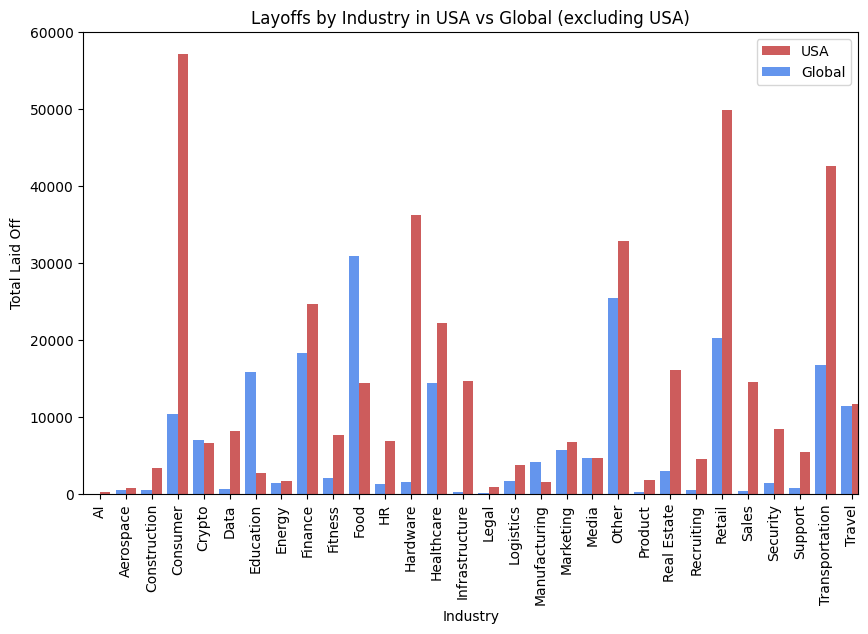

In [9]:
# Analyzing industry layoffs in the US and the rest of the world

# Creating bar charts separately

usa_ind_layoffs_df = layoffs_data_df[(layoffs_data_df["country"] == "United States")]
global_ind_layoffs_df = layoffs_data_df[(layoffs_data_df["country"] != "United States")]

fig, ax = plt.subplots(figsize=(10, 6))

usa_ind_layoffs_df.groupby('industry')['total_laid_off'].sum().plot(kind='bar', ax=ax, color='indianred', width=0.4, position=0, label='USA')
global_ind_layoffs_df.groupby('industry')['total_laid_off'].sum().plot(kind='bar', ax=ax, color='cornflowerblue', width=0.4, position=1, label='Global')

# Adding labels and title
plt.xlabel('Industry')
plt.ylabel('Total Laid Off')
plt.title('Layoffs by Industry in USA vs Global (excluding USA)')
plt.legend()

plt.show()

In [10]:
# Analyzing layoffs per quarter

quarter_df = layoffs_data_df

#Formating date to datetime 
quarter_df['date'] = pd.to_datetime(quarter_df['date'], format='%Y-%m')

# Check if the conversion
print(layoffs_data_df['date'].dtype)

#Creatindg 2 new columns:
quarter_df['quarter'] = quarter_df['date'].dt.to_period('Q')
quarter_df['year'] = quarter_df['date'].dt.strftime('%Y')

display(quarter_df)

datetime64[ns]


,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,quarter,year
0,FlightStats,Portland,Travel,73.0,0.00,2024-05-01,Acquired,United States,3.0,2024Q2,2024
1,Walnut,New York City,Sales,15.0,0.20,2024-05-01,Series B,United States,56.0,2024Q2,2024
3,Lucid Motors,SF Bay Area,Transportation,400.0,0.06,2024-05-01,Post-IPO,United States,8300.0,2024Q2,2024
4,Foursquare,New York City,Marketing,105.0,0.25,2024-05-01,Series G,United States,390.0,2024Q2,2024
5,Guild,Denver,Education,300.0,0.25,2024-05-01,Series F,United States,643.0,2024Q2,2024
...,...,...,...,...,...,...,...,...,...,...,...
3619,Help.com,Austin,Support,16.0,1.00,2020-03-01,Seed,United States,6.0,2020Q1,2020
3621,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-01,Unknown,United States,45.0,2020Q1,2020
3622,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-01,Seed,United States,1.0,2020Q1,2020
3623,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03-01,Series C,United States,90.0,2020Q1,2020


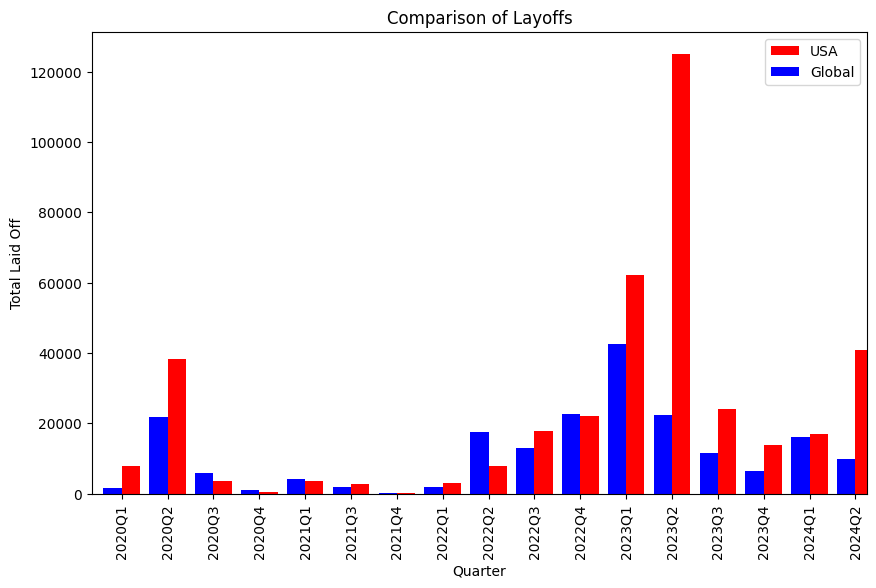

In [11]:
usa_quarter_df = layoffs_data_df[(layoffs_data_df["country"] == "United States")]
global_quarter_df = layoffs_data_df[(layoffs_data_df["country"] != "United States")]

fig, ax = plt.subplots(figsize=(10, 6))

usa_quarter_df.groupby('quarter')['total_laid_off'].sum().plot(kind='bar', ax=ax, color='red', width=0.4, position=0, label='USA')
global_quarter_df.groupby('quarter')['total_laid_off'].sum().plot(kind='bar', ax=ax, color='blue', width=0.4, position=1, label='Global')

# Adding labels and title
plt.xlabel('Quarter')
plt.ylabel('Total Laid Off')
plt.title('Comparison of Layoffs')
plt.legend()

# show chart
plt.show()

In [12]:
# highest number of layoff per quarter
total_quarter = quarter_df.groupby('quarter')['total_laid_off'].sum()
total_quarter_df = total_quarter.sort_values(ascending=False).head()
display(total_quarter_df)
print(sum(total_quarter_df))

quarter
2023Q1    167574.0
2022Q4     84929.0
2020Q2     60141.0
2024Q1     57099.0
2023Q2     46433.0
Freq: Q-DEC, Name: total_laid_off, dtype: float64

416176.0


In [13]:
# highest number of layoff  per month
total_month = quarter_df.groupby('date')['total_laid_off'].sum()
total_month_df = total_month.sort_values(ascending=False).head()
display(total_month_df)
print(sum(total_month_df))

date
2023-01-01    89709.0
2022-11-01    53594.0
2023-02-01    39902.0
2023-03-01    37963.0
2024-01-01    34107.0
Name: total_laid_off, dtype: float64

255275.0


In [14]:
# highest number of layoffs per company
company = quarter_df.groupby('company')['total_laid_off'].sum()
company_df = company.sort_values(ascending=False).head(10)
display(company_df)
print(sum(company_df))

company
Amazon        27840.0
Meta          21000.0
Tesla         14500.0
Google        13372.0
Microsoft     13058.0
Dell          12650.0
SAP           11000.0
Salesforce    10840.0
Philips       10000.0
Cisco          8700.0
Name: total_laid_off, dtype: float64

142960.0


In [15]:
# Top industry
industry = quarter_df.groupby('industry')['total_laid_off'].sum()
industry_df = industry.sort_values(ascending=False).head(10)
display(industry_df)
print(sum(industry_df))

industry
Retail            70157.0
Consumer          67575.0
Transportation    59417.0
Other             58261.0
Food              45445.0
Finance           42913.0
Hardware          37750.0
Healthcare        36717.0
Travel            23132.0
Real Estate       19108.0
Name: total_laid_off, dtype: float64

460475.0


In [16]:
# Filter the data for the United States for both Consumer and Retail industries
usa_consumer_retail = quarter_df[(quarter_df["country"] == "United States") & 
                                 (quarter_df["industry"].isin(["Consumer", "Retail"]))]

# Filter the data for all other countries (global data excluding the United States)
global_industry= quarter_df[quarter_df["country"] != "United States"]

# Group by industry and sum the total layoffs
usa_consumer_retail_lay = usa_consumer_retail.groupby('industry')['total_laid_off'].sum()
global_industry_lay = global_industry.groupby('industry')['total_laid_off'].sum()

usa_consumer_retail_lay_df = usa_consumer_retail_lay.sort_values(ascending=False).head()
global_industry_lay_df = global_industry_lay.sort_values(ascending=False).head(5)

# Display the top industries by layoffs for the USA
print("Top industries by layoffs in the USA (Consumer and Retail):")
display(usa_consumer_retail_lay_df)

# Display the top industries by layoffs globally
print("Top industries by layoffs globally (excluding the USA):")
display(global_industry_lay_df)

# Print the sum
print('Total layoffs in USA Consumer and Retail industries:', usa_consumer_retail_lay_df.sum())
print('Total layoffs in global industries (excluding USA):', global_industry_lay_df.sum())


Top industries by layoffs in the USA (Consumer and Retail):


industry
Consumer    57220.0
Retail      49887.0
Name: total_laid_off, dtype: float64

Top industries by layoffs globally (excluding the USA):


industry
Food              30984.0
Other             25442.0
Retail            20270.0
Finance           18272.0
Transportation    16742.0
Name: total_laid_off, dtype: float64

Total layoffs in USA Consumer and Retail industries: 107107.0
Total layoffs in global industries (excluding USA): 111710.0


country
India             51234.0
Germany           26353.0
United Kingdom    19769.0
Netherlands       18445.0
Sweden            13619.0
Name: total_laid_off, dtype: float64

Total layoffs in USA Consumer and Retail industries: 107107.0
Total layoffs Top 5 countries (excluding USA): 129420.0


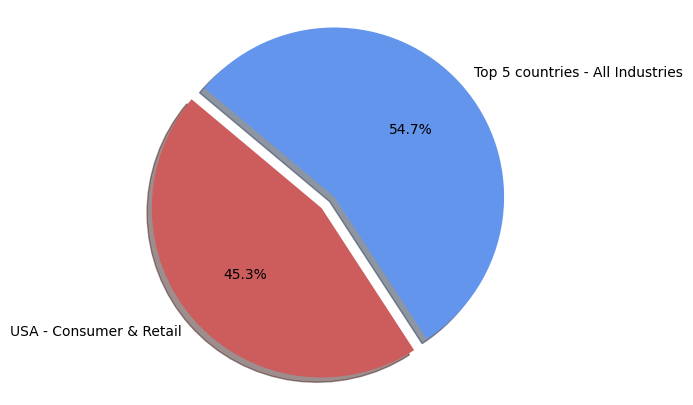

In [51]:
# Filter the data for the United States for both Consumer and Retail industries
usa_consumer_retail = quarter_df[(quarter_df["country"] == "United States") & 
                                 (quarter_df["industry"].isin(["Consumer", "Retail"]))]

# Filter the data for all other countries (global data excluding the United States)
global_industry = quarter_df[quarter_df["country"] != "United States"]

# Group by industry 
usa_consumer_retail_lay = usa_consumer_retail.groupby('industry')['total_laid_off'].sum()
global_industry_lay = global_industry.groupby('country')['total_laid_off'].sum().sort_values(ascending=False).head(5)

display(global_industry_lay)

# Sum the total layoffs 
total_usa_layoffs = usa_consumer_retail_lay.sum()
total_global_layoffs = global_industry_lay.sum()

print('Total layoffs in USA Consumer and Retail industries:', total_usa_layoffs)
print('Total layoffs Top 5 countries (excluding USA):', total_global_layoffs)

labels = ['USA - Consumer & Retail', 'Top 5 countries - All Industries']
sizes = [total_usa_layoffs, total_global_layoffs]
colors = ['indianred','cornflowerblue']
explode = (0.1, 0) 

# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
#plt.title('Total Layoffs: USA (Consumer & Retail) vs. Global (all industries)')
plt.axis('equal') 

plt.show()

In [18]:
# New dataframe for companies with the highest layoffs in 2020.
lay_2020 = quarter_df['year'].values == '2020'
lay_2020_df = quarter_df[lay_2020]
lay_2020_df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,quarter,year
2990,Pulse Secure,SF Bay Area,Security,78.0,0.00,2020-12-01,Acquired,United States,0.0,2020Q4,2020
2991,Breather,Montreal,Real Estate,120.0,0.80,2020-12-01,Series D,Canada,131.0,2020Q4,2020
2992,Actifio,Boston,Data,54.0,0.00,2020-12-01,Acquired,United States,352.0,2020Q4,2020
2993,OYO,Gurugram,Travel,600.0,0.00,2020-12-01,Series F,India,3200.0,2020Q4,2020
2995,Aya,Toronto,Finance,5.0,0.25,2020-11-01,Seed,United States,3.0,2020Q4,2020


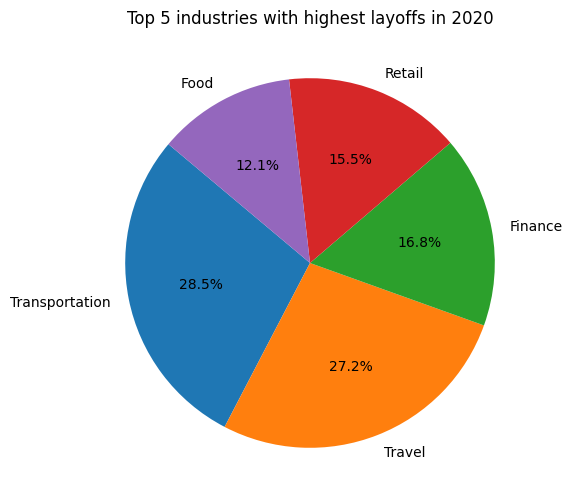

In [19]:
#Layoff by Industry in 2020

# # Calculated the total layoffs per industry and select the top 5 industries
top_industries = lay_2020_df.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head(5)

# Plotar pie plot
plt.figure(figsize=(12, 6))
plt.pie(top_industries, labels=top_industries.index, autopct='%1.1f%%', startangle=140)

# add title
plt.title('Top 5 industries with highest layoffs in 2020')

# show chart
plt.show()

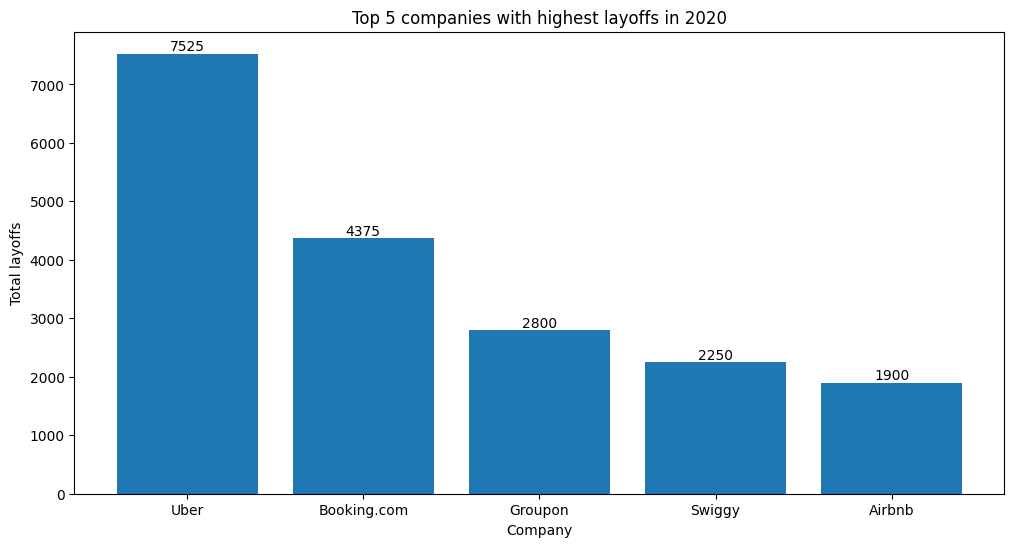

In [20]:
#Layoff by Company in 2020

# Calculate the total layoffs per company and select the top 5
top_companies = lay_2020_df.groupby('company')['total_laid_off'].sum().sort_values(ascending=False).head()

# # Plot the bar chart with labels over the bars
plt.figure(figsize=(12, 6))
bars = plt.bar(top_companies.index, top_companies.values)
plt.bar_label(bars, label_type='edge', fmt='%.0f')

# Add titles
plt.title('Top 5 companies with highest layoffs in 2020')
plt.ylabel('Total layoffs')
plt.xlabel('Company')

plt.show()

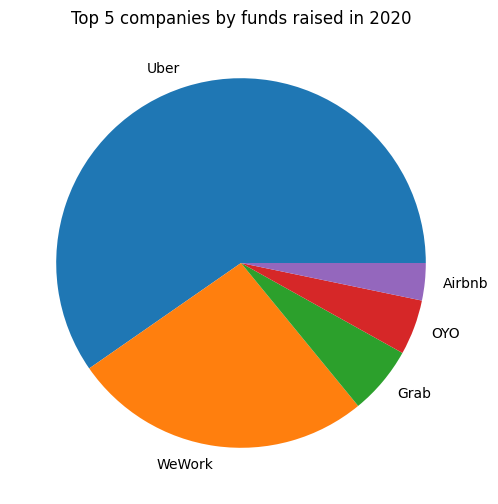

In [21]:
# #Company by fund raised in 2020
top_fund_raised = lay_2020_df.groupby('company')['funds_raised'].sum().sort_values(ascending=False).head(5)

# Plot pie chart
plt.figure(figsize=(12, 6))
plt.pie(top_fund_raised, labels=top_fund_raised.index)

# Add title
plt.title('Top 5 companies by funds raised in 2020')

# show chart
plt.show()


In [22]:
# New dataframes 

# 2021
lay_2021 = quarter_df['year'].values == '2021'
lay_2021_df = quarter_df[lay_2021]

# 2022
lay_2022 = quarter_df['year'].values == '2022'
lay_2022_df = quarter_df[lay_2022]

# 2023
lay_2023 = quarter_df['year'].values == '2022'
lay_2023_df = quarter_df[lay_2022]

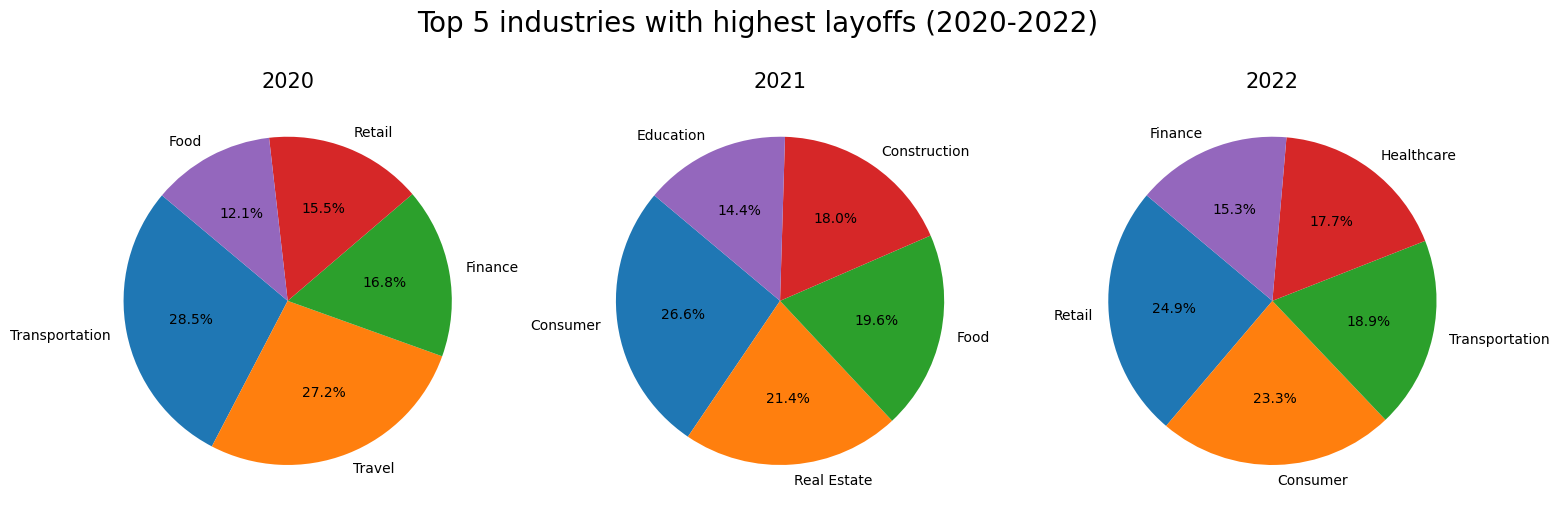

In [23]:
# Calculating total layoffs by sector and selecting the top 5 for each year
top_industries_2020 = lay_2020_df.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head()
top_industries_2021 = lay_2021_df.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head()
top_industries_2022 = lay_2022_df.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head()

# Configure side-by-side subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Pie Chart for 2020
axs[0].pie(top_industries_2020, labels=top_industries_2020.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('2020', fontsize=15)

# Pie Chart for 2021
axs[1].pie(top_industries_2021, labels=top_industries_2021.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('2021', fontsize=15)

# Pie Chart for 2022
axs[2].pie(top_industries_2022, labels=top_industries_2022.index, autopct='%1.1f%%', startangle=140)
axs[2].set_title('2022', fontsize=15)

# Title
fig.suptitle('Top 5 industries with highest layoffs (2020-2022)', fontsize=20)

plt.show()

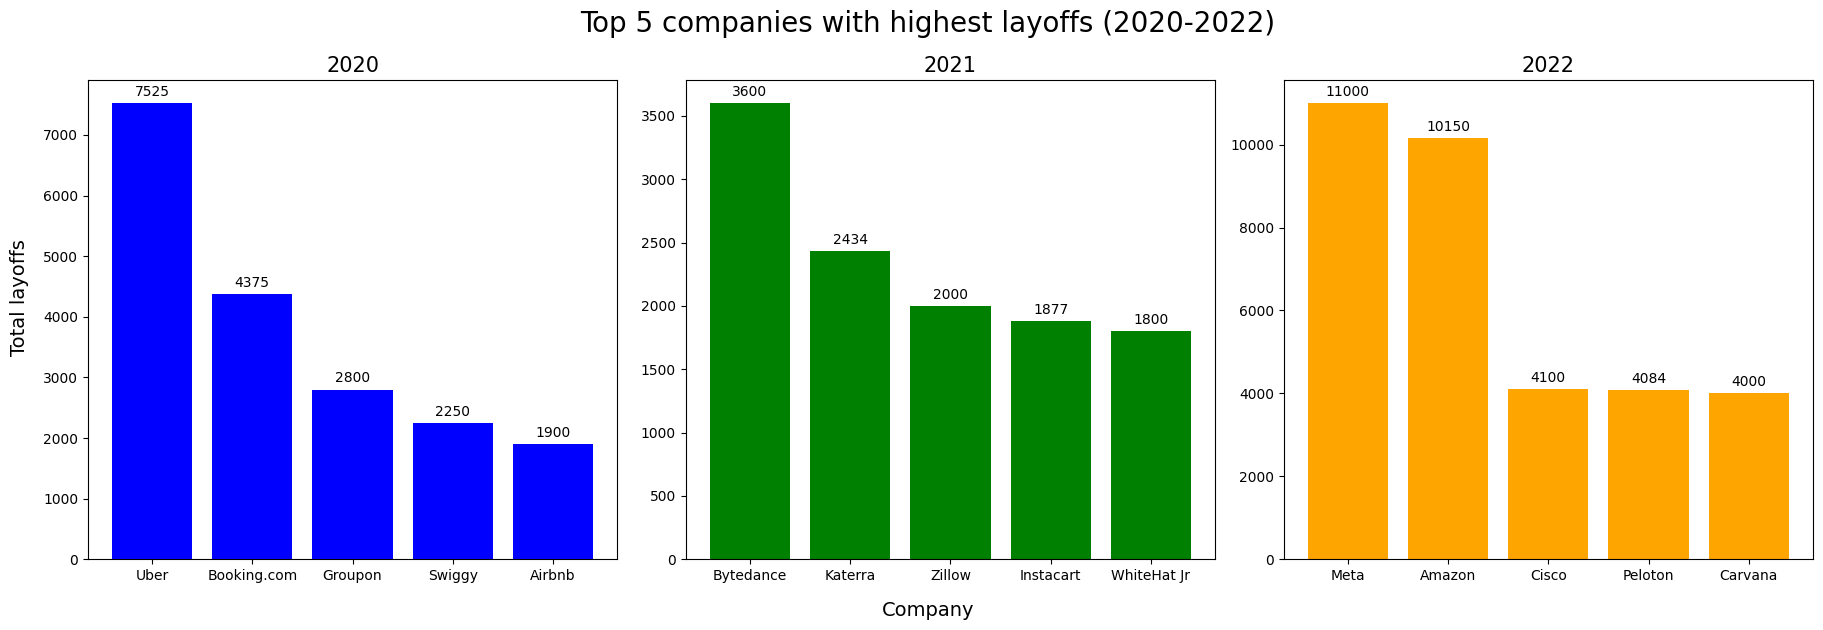

In [24]:

# Calculating total layoffs per company and select the top 5 for each year
top_companies_2020 = lay_2020_df.groupby('company')['total_laid_off'].sum().sort_values(ascending=False).head()
top_companies_2021 = lay_2021_df.groupby('company')['total_laid_off'].sum().sort_values(ascending=False).head()
top_companies_2022 = lay_2022_df.groupby('company')['total_laid_off'].sum().sort_values(ascending=False).head()

# subplots 
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Function to add bar_label
def add_bar_labels(ax, data, color):
    rects = ax.bar(data.index, data.values, color=color)
    ax.bar_label(rects, padding=3)  

# Chart for 2020 
add_bar_labels(axs[0], top_companies_2020, color='blue')
axs[0].set_title('2020', fontsize=15)

# Chart for 2021
add_bar_labels(axs[1], top_companies_2021, color='green')
axs[1].set_title('2021', fontsize=15)

# Chart for 2022
add_bar_labels(axs[2], top_companies_2022, color='orange')
axs[2].set_title('2022', fontsize=15)

#  titles
fig.suptitle('Top 5 companies with highest layoffs (2020-2022)', fontsize=20)
fig.text(0.5, -0.03, 'Company', ha='center', fontsize=14)
fig.text(-0.01, 0.5, 'Total layoffs', va='center', rotation='vertical', fontsize=14)

plt.tight_layout()
plt.show()

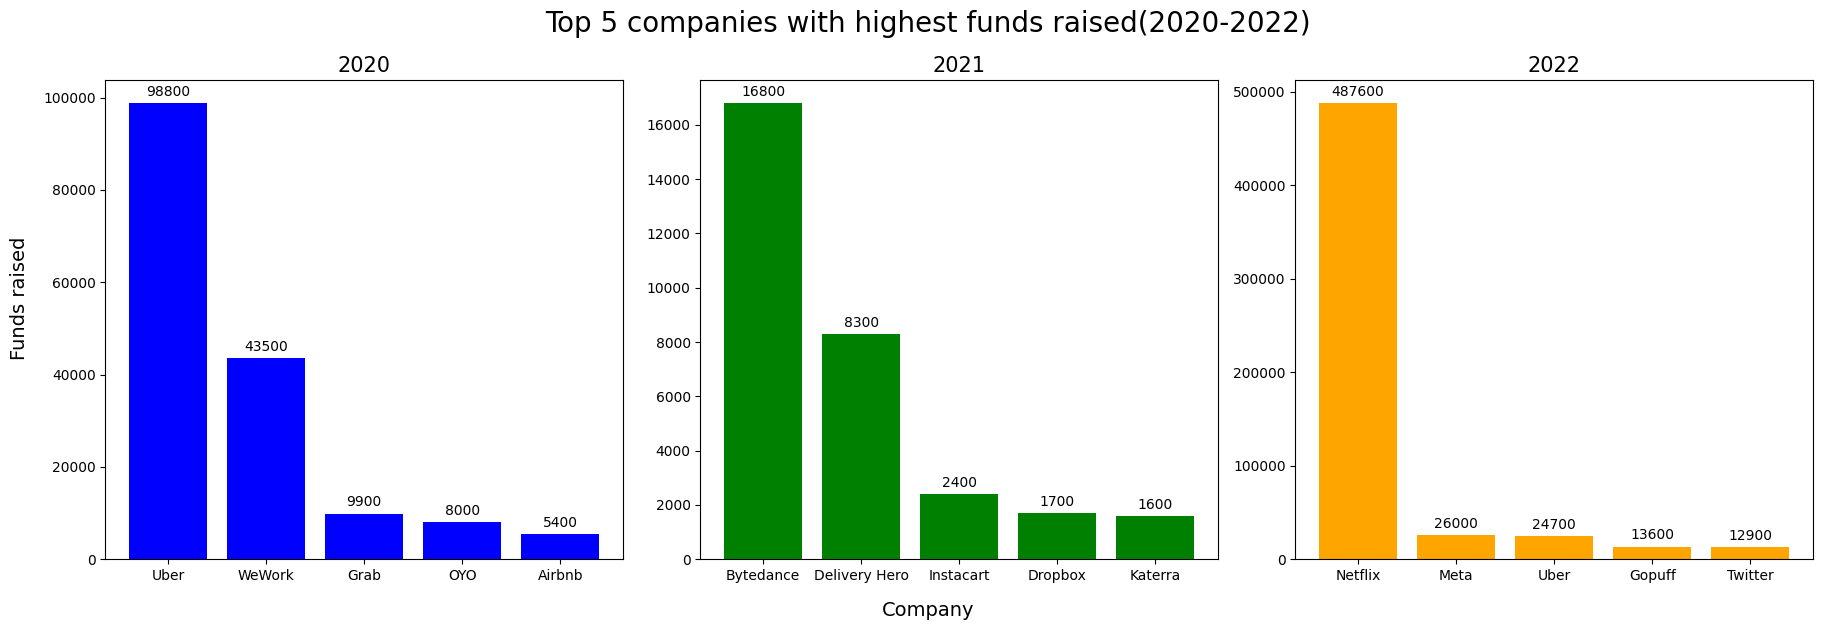

In [25]:
# Calculating total layoffs per fund raised and selecting the top 5 for each year
top_fund_raised_2020 = lay_2020_df.groupby('company')['funds_raised'].sum().sort_values(ascending=False).head()
top_fund_raised_2021 = lay_2021_df.groupby('company')['funds_raised'].sum().sort_values(ascending=False).head()
top_fund_raised_2022 = lay_2022_df.groupby('company')['funds_raised'].sum().sort_values(ascending=False).head()

# subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    
# Function to add bar_label
def add_bar_labels(ax, data, color):
    rects = ax.bar(data.index, data.values, color=color)
    ax.bar_label(rects, padding=3) 

# # Chart for 2020
add_bar_labels(axs[0], top_fund_raised_2020, color='blue')
axs[0].set_title('2020', fontsize=15)

# # Chart for 2021
add_bar_labels(axs[1], top_fund_raised_2021, color='green')
axs[1].set_title('2021', fontsize=15)

# # Chart for 2022
add_bar_labels(axs[2], top_fund_raised_2022, color='orange')
axs[2].set_title('2022', fontsize=15)

# Titles
fig.suptitle('Top 5 companies with highest funds raised(2020-2022)', fontsize=20)
fig.text(0.5, -0.03, 'Company', ha='center', fontsize=14)
fig.text(-0.01, 0.5, 'Funds raised', va='center', rotation='vertical', fontsize=14)

plt.tight_layout()
plt.show()

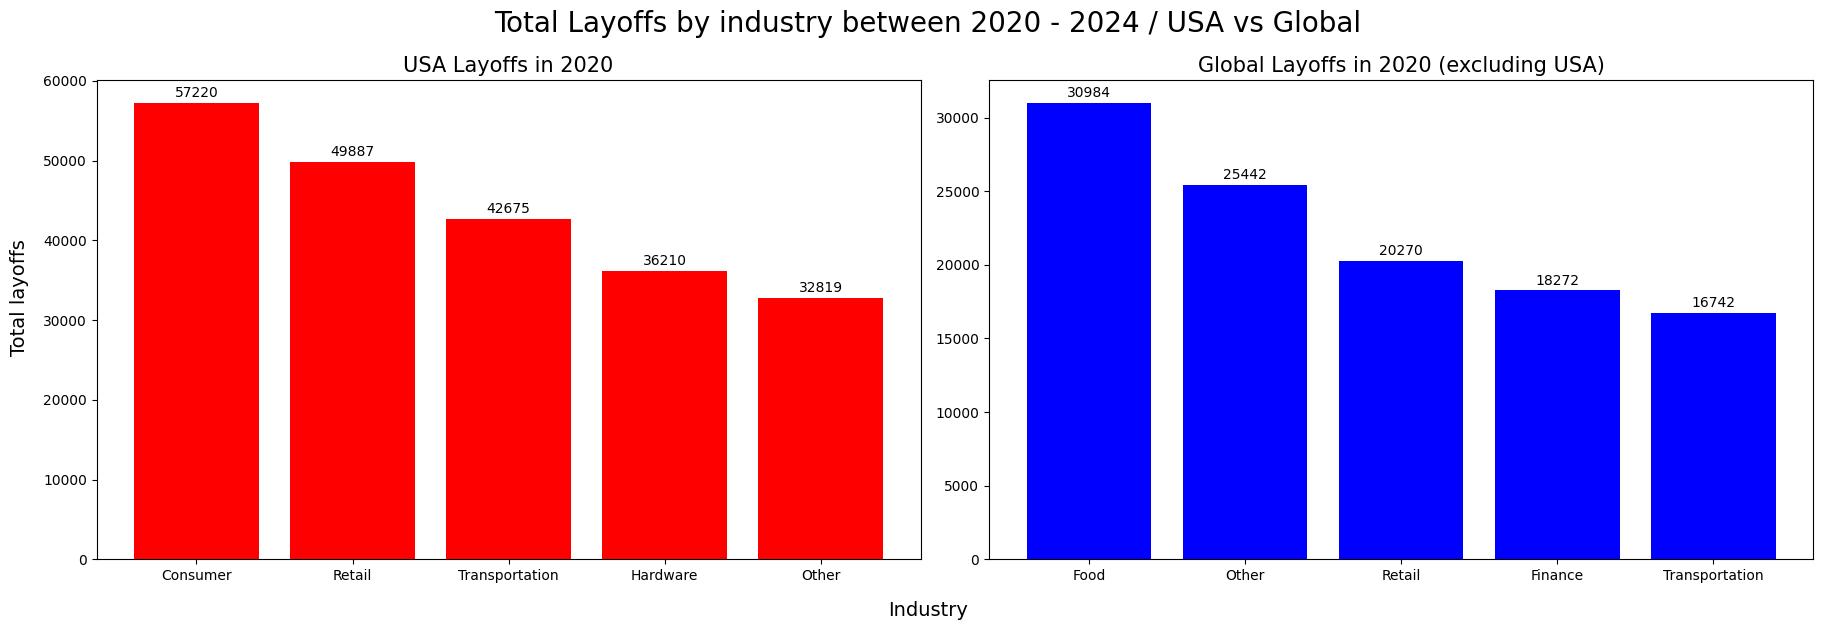

In [26]:
# Filtrar dados para os Estados Unidos e para o global (excluindo os EUA)
usa_lay_ind = quarter_df[quarter_df["country"] == "United States"]
global_lay_ind = quarter_df[quarter_df["country"] != "United States"]

# Calcular o total de layoffs por trimestre (quarter) e selecionar os 5 principais para cada ano
usa_lay_ind_df = usa_lay_ind.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head()
global_lay_ind_df = global_lay_ind.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head()

# Convertendo os índices para strings explícitas
usa_lay_ind_df.index = usa_lay_ind_df.index.astype(str)
global_lay_ind_df.index = global_lay_ind_df.index.astype(str)

# Configurar subplots lado a lado
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Função para adicionar bar_labels
def add_bar_labels(ax, data, color):
    rects = ax.bar(data.index, data.values, color=color)
    ax.bar_label(rects, padding=2)  # Adiciona os rótulos das barras com um padding de 2 pontos

# Gráfico de barras para os EUA (azul)
add_bar_labels(axs[0], usa_lay_ind_df, color='red')
axs[0].set_title('USA Layoffs in 2020', fontsize=15)

# Gráfico de barras para Global (verde)
add_bar_labels(axs[1], global_lay_ind_df, color='blue')
axs[1].set_title('Global Layoffs in 2020 (excluding USA)', fontsize=15)

# Título geral para os subplots
fig.suptitle('Total Layoffs by industry between 2020 - 2024 / USA vs Global', fontsize=20)

# Rótulo do eixo y na parte inferior
fig.text(0.5, -0.03, 'Industry', ha='center', fontsize=14)

# Rótulo do eixo x à esquerda
fig.text(-0.01, 0.5, 'Total layoffs', va='center', rotation='vertical', fontsize=14)

# Ajustar layout
plt.tight_layout()

# Exibir os gráficos
plt.show()

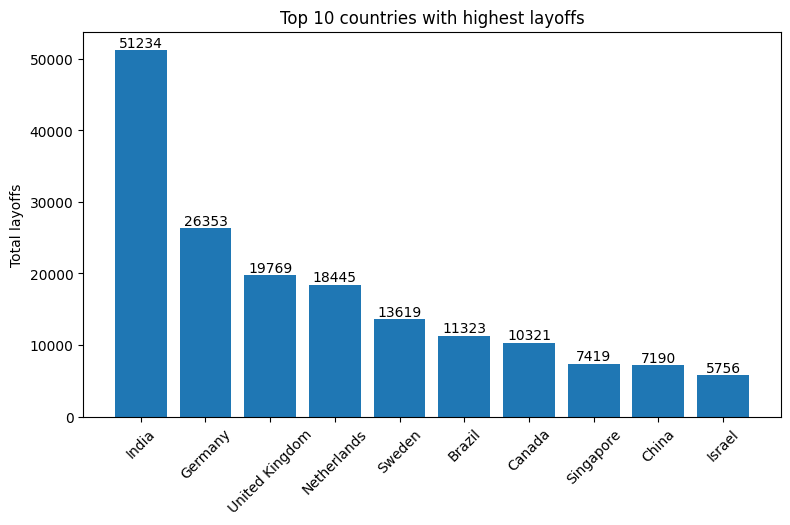

In [27]:
## Calculate the total layoffs per company and select the top 5

global_lay_country = quarter_df[quarter_df["country"] != "United States"]

global_lay_country_df = global_lay_country.groupby('country')['total_laid_off'].sum().sort_values(ascending=False).head(10)

# Chart
plt.figure(figsize=(9, 5))
bars = plt.bar(global_lay_country_df.index, global_lay_country_df.values)

plt.bar_label(bars, label_type='edge', fmt='%.0f')

# Add title
plt.title('Top 10 countries with highest layoffs')
plt.ylabel('Total layoffs')
#plt.xlabel('Country')
plt.xticks(rotation=45)

# show chart
plt.show()

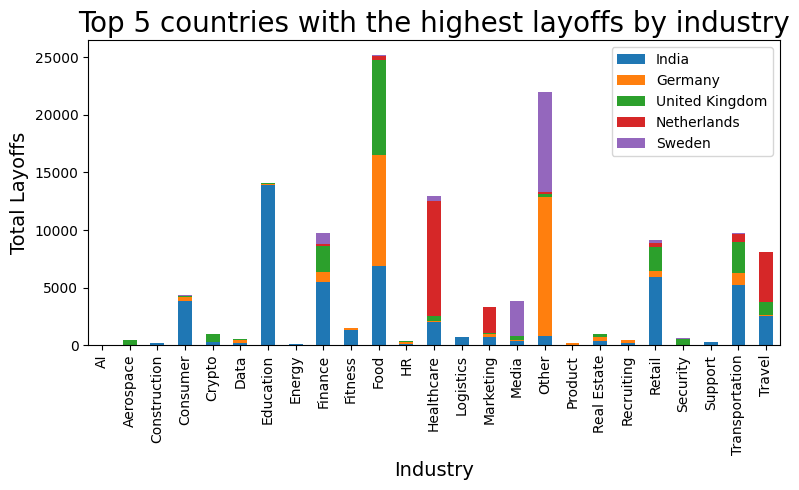

In [28]:
# Filter data for India, Netherlands and Germany
India = global_quarter_df[global_quarter_df["country"] == "India"]
Germany = global_quarter_df[global_quarter_df["country"] == "Germany"]
United_Kingdom = global_quarter_df[global_quarter_df["country"] == "United Kingdom"]
Netherlands = global_quarter_df[global_quarter_df["country"] == "Netherlands"]
Sweden = global_quarter_df[global_quarter_df["country"] == "Sweden"]

#Calculate total layoffs by industry for each country
India_df = India.groupby('industry')['total_laid_off'].sum()
Germany_df = Germany.groupby('industry')['total_laid_off'].sum()
United_Kingdom_df = United_Kingdom.groupby('industry')['total_laid_off'].sum()
Netherlands_df = Netherlands.groupby('industry')['total_laid_off'].sum()
Sweden_df = Sweden.groupby('industry')['total_laid_off'].sum()


# New DataFrame 
combined_df = pd.DataFrame({
    'India': India_df,
    'Germany': Germany_df,
    'United Kingdom': United_Kingdom_df,
    'Netherlands': Netherlands_df,
    'Sweden': Sweden_df
}).fillna(0) 

ax = combined_df.plot(kind='bar', stacked=True, figsize=(8, 5))

# Add Title
plt.title('Top 5 countries with the highest layoffs by industry', fontsize=20)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Total Layoffs', fontsize=14)

plt.tight_layout()

# Show chart
plt.show()

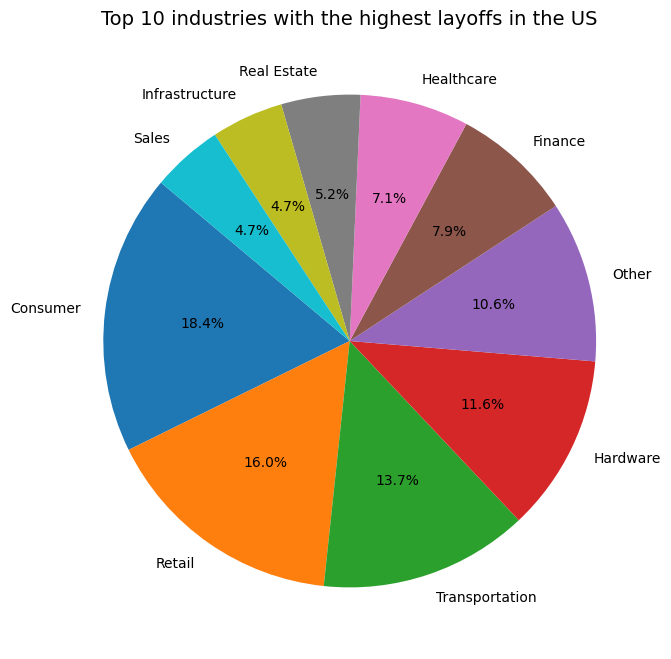

In [29]:
# Filter data for all countries except the United States
all_layoffs_df = layoffs_data_df[layoffs_data_df["country"] == "United States"]

# Group by industry 
layoffs_by_industry = all_layoffs_df.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head(10)

# Pie chart
plt.figure(figsize=(10, 8))
plt.pie(layoffs_by_industry, labels=layoffs_by_industry.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 10 industries with the highest layoffs in the US", fontsize=14)

plt.show()

In [30]:
# -----------------------------  David
# filter data to U.S. between 2021 to 2022
#filtered_data = data[data['country'] == 'United States']
us_layoffs = layoffs_data_df[(layoffs_data_df['country'] == 'United States')]
row_layoffs = layoffs_data_df[(layoffs_data_df['country'] != 'United States')]
                                     
                                     #& 
                                    #(layoffs_data_df['date'].dt.year >= 2020) & 
                                    #(layoffs_data_df['date'].dt.year <= 2022)]
us_layoffs.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,quarter,year
0,FlightStats,Portland,Travel,73.0,0.00,2024-05-01,Acquired,United States,3.0,2024Q2,2024
1,Walnut,New York City,Sales,15.0,0.20,2024-05-01,Series B,United States,56.0,2024Q2,2024
3,Lucid Motors,SF Bay Area,Transportation,400.0,0.06,2024-05-01,Post-IPO,United States,8300.0,2024Q2,2024
4,Foursquare,New York City,Marketing,105.0,0.25,2024-05-01,Series G,United States,390.0,2024Q2,2024
5,Guild,Denver,Education,300.0,0.25,2024-05-01,Series F,United States,643.0,2024Q2,2024


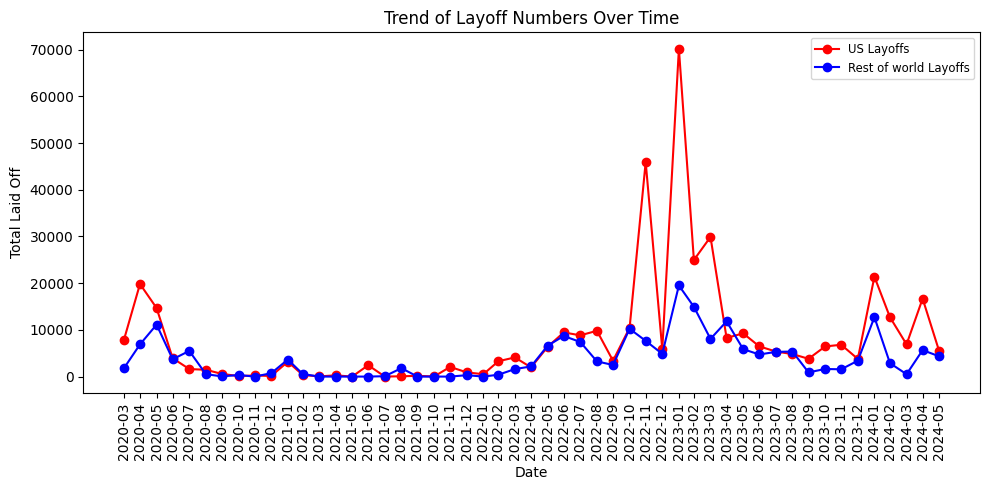

In [31]:
### Trend of lay off overtime - and specific months or periods of layoffs

# Group the data by month and sum the total_laid_off for each month
us_layoffs_trend = us_layoffs.set_index('date').resample('M')['total_laid_off'].sum()
us_layoffs_trend_Q = us_layoffs.set_index('date').resample('Q')['total_laid_off'].sum()

row_layoffs_trend = row_layoffs.set_index('date').resample('M')['total_laid_off'].sum()
row_layoffs_trend_Q = row_layoffs.set_index('date').resample('Q')['total_laid_off'].sum()


# Plot the trend graph
plt.figure(figsize=(10, 5))
plt.plot(us_layoffs_trend.index, us_layoffs_trend.values, marker='o', linestyle='-', color='red', label='US Layoffs')
plt.plot(row_layoffs_trend.index, row_layoffs_trend.values, marker='o', linestyle='-', color='blue', label='Rest of world Layoffs')

plt.title('Trend of Layoff Numbers Over Time')
plt.xlabel('Date')
plt.ylabel('Total Laid Off')
plt.legend(loc='upper right', fontsize='small')
plt.xticks(us_layoffs_trend.index, [date.strftime('%Y-%m') for date in us_layoffs_trend.index], rotation=90)
plt.tight_layout()
plt.show()

In [32]:
### Impact by Location: Which geographical areas (cities, countries, etc.) have had the most layoffs? Is there a correlation between location and the severity of layoffs?

# Analyzing by location (entire data set)
location_layoffs = us_layoffs.groupby('location')['total_laid_off'].sum().reset_index()
location_layoffs = location_layoffs.sort_values(by='total_laid_off', ascending=False).head(10)

# Analyzing by location 2020
us_layoffs_2020 = us_layoffs[(us_layoffs['date'].dt.year == 2020)] 
location_layoffs_2020 = us_layoffs_2020.groupby('location')['total_laid_off'].sum().reset_index()
location_layoffs_2020 = location_layoffs_2020.sort_values(by='total_laid_off', ascending=False).head(10)

# Analyzing by location 2021
us_layoffs_2021 = us_layoffs[(us_layoffs['date'].dt.year == 2021)] 
location_layoffs_2021 = us_layoffs_2021.groupby('location')['total_laid_off'].sum().reset_index()
location_layoffs_2021 = location_layoffs_2021.sort_values(by='total_laid_off', ascending=False).head(10)

# Analyzing by location 2022
us_layoffs_2022 = us_layoffs[(us_layoffs['date'].dt.year == 2022)] 
location_layoffs_2022 = us_layoffs_2022.groupby('location')['total_laid_off'].sum().reset_index()
location_layoffs_2022 = location_layoffs_2022.sort_values(by='total_laid_off', ascending=False).head(10)

# Analyzing by location 2023
us_layoffs_2023 = us_layoffs[(us_layoffs['date'].dt.year == 2023)] 
location_layoffs_2023 = us_layoffs_2023.groupby('location')['total_laid_off'].sum().reset_index()
location_layoffs_2023 = location_layoffs_2023.sort_values(by='total_laid_off', ascending=False).head(10)

# Analyzing by location 2024
us_layoffs_2024 = us_layoffs[(us_layoffs['date'].dt.year == 2024)] 
location_layoffs_2024 = us_layoffs_2024.groupby('location')['total_laid_off'].sum().reset_index()
location_layoffs_2024 = location_layoffs_2024.sort_values(by='total_laid_off', ascending=False).head(10)

location_layoffs

,location,total_laid_off
64,SF Bay Area,184021.0
73,Seattle,52562.0
54,New York City,35929.0
3,Austin,33545.0
10,Boston,16591.0
41,Los Angeles,10160.0
16,Chicago,8295.0
9,Boise,7275.0
68,San Diego,6100.0
59,Phoenix,5681.0


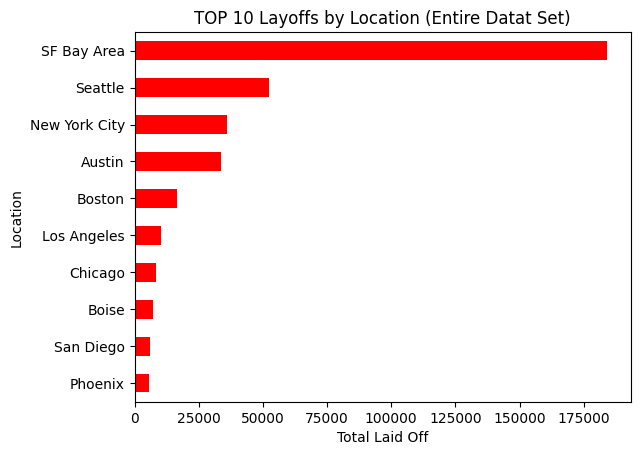

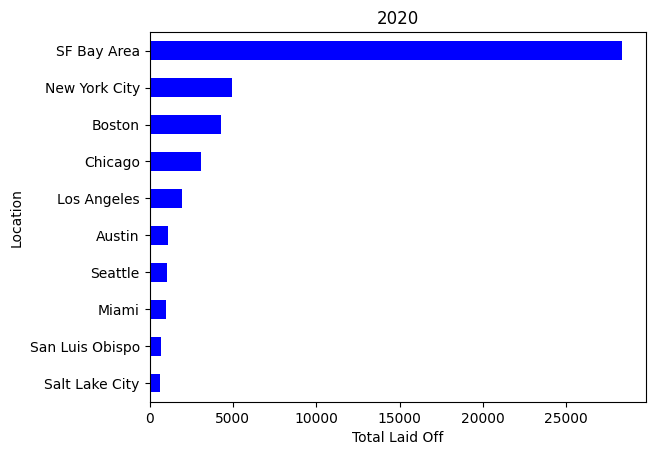

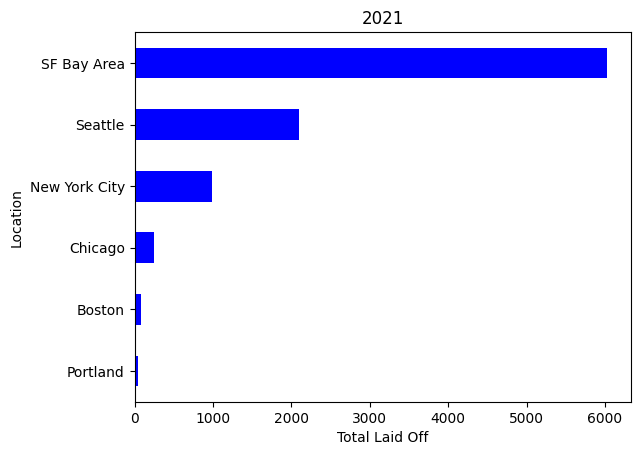

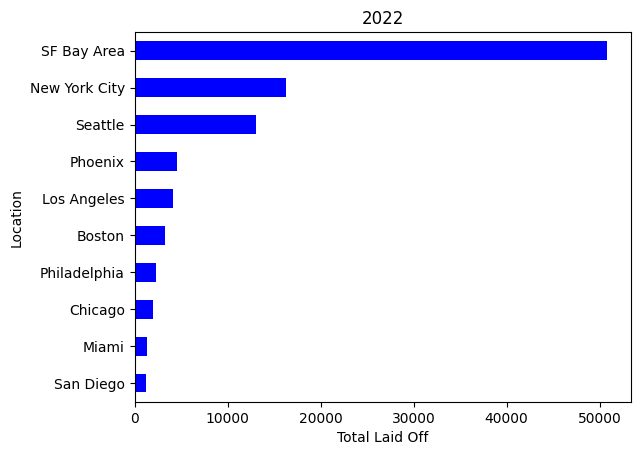

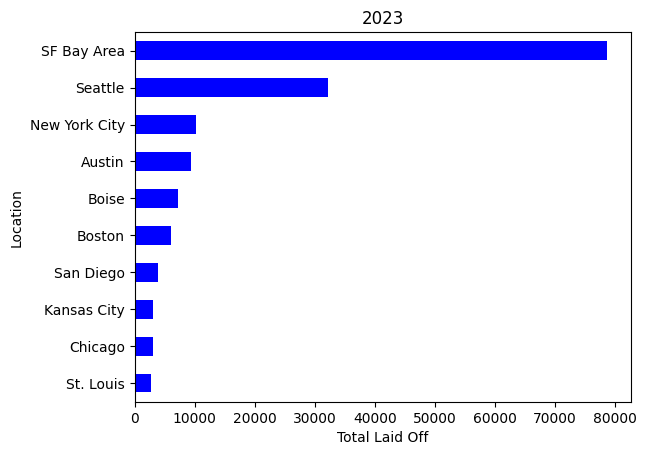

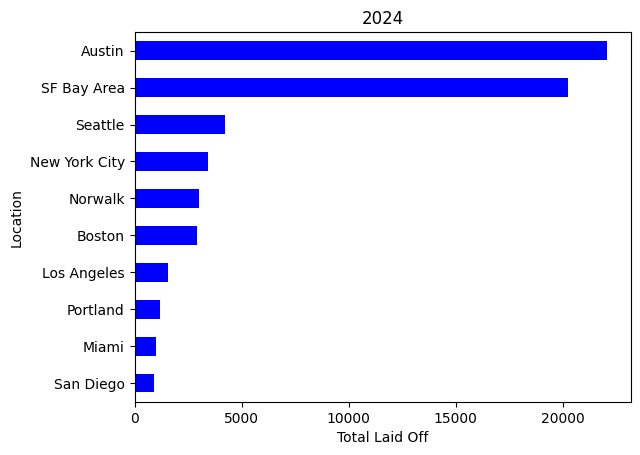

In [33]:
## grpahs

# Visualize (entire data set)
fig, ax = plt.subplots()
location_layoffs.plot(kind='barh', x='location', y='total_laid_off', color='red', legend=False, ax=ax)
ax.set_title('TOP 10 Layoffs by Location (Entire Datat Set)')
ax.set_xlabel('Total Laid Off')
ax.set_ylabel('Location')
ax.invert_yaxis()  # Invert y-axis to have the highest values at the top
plt.show()

# Visualize (2020)
fig, ax = plt.subplots()
location_layoffs_2020.plot(kind='barh', x='location', y='total_laid_off', color='blue',  legend=False, ax=ax)
ax.set_title('2020')
ax.set_xlabel('Total Laid Off')
ax.set_ylabel('Location')
ax.invert_yaxis()  # Invert y-axis to have the highest values at the top
plt.show()

# Visualize (2021)
fig, ax = plt.subplots()
location_layoffs_2021.plot(kind='barh', x='location', y='total_laid_off', color='blue',  legend=False, ax=ax)
ax.set_title('2021')
ax.set_xlabel('Total Laid Off')
ax.set_ylabel('Location')
ax.invert_yaxis()  # Invert y-axis to have the highest values at the top
plt.show()

# Visualize (2022)
fig, ax = plt.subplots()
location_layoffs_2022.plot(kind='barh', x='location', y='total_laid_off', color='blue',  legend=False, ax=ax)
ax.set_title('2022')
ax.set_xlabel('Total Laid Off')
ax.set_ylabel('Location')
ax.invert_yaxis()  # Invert y-axis to have the highest values at the top
plt.show()

# Visualize (2023)
fig, ax = plt.subplots()
location_layoffs_2023.plot(kind='barh', x='location', y='total_laid_off', color='blue',  legend=False, ax=ax)
ax.set_title('2023')
ax.set_xlabel('Total Laid Off')
ax.set_ylabel('Location')
ax.invert_yaxis()  # Invert y-axis to have the highest values at the top
plt.show()

# Visualize (2024)
fig, ax = plt.subplots()
location_layoffs_2024.plot(kind='barh', x='location', y='total_laid_off', color='blue',  legend=False, ax=ax)
ax.set_title('2024')
ax.set_xlabel('Total Laid Off')
ax.set_ylabel('Location')
ax.invert_yaxis()  # Invert y-axis to have the highest values at the top
plt.show()

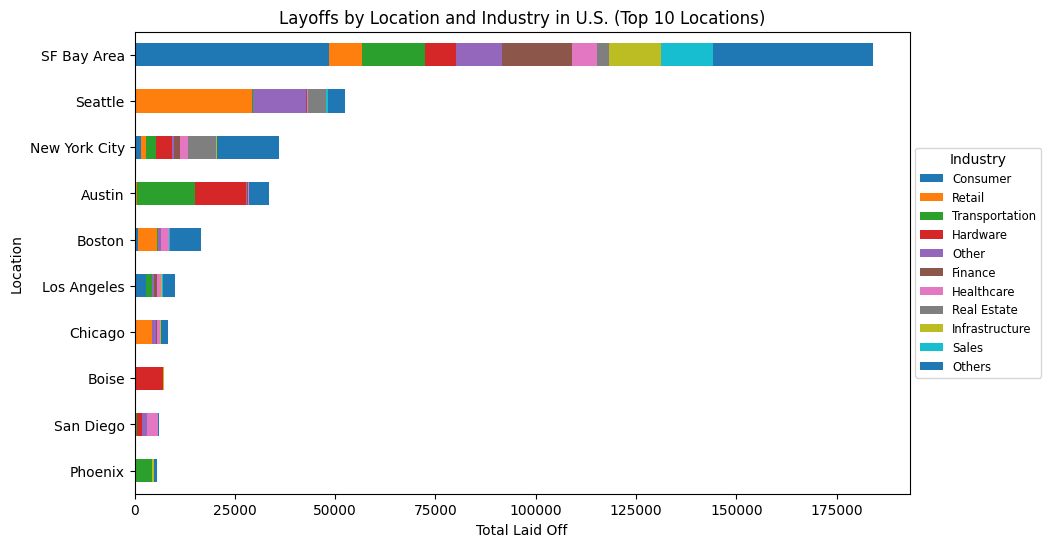

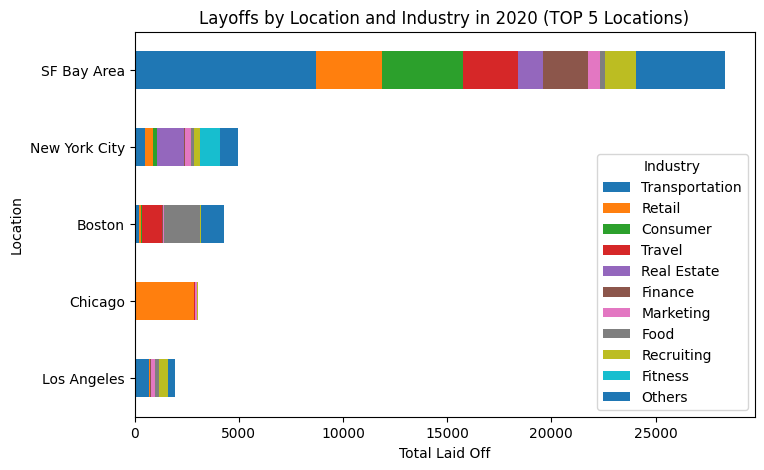

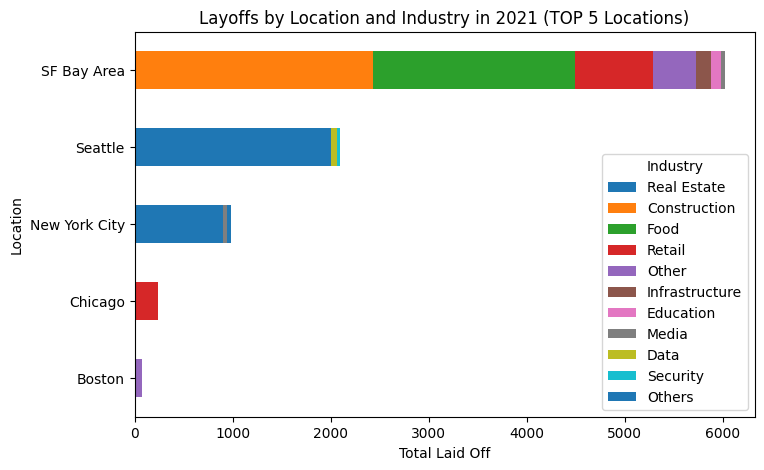

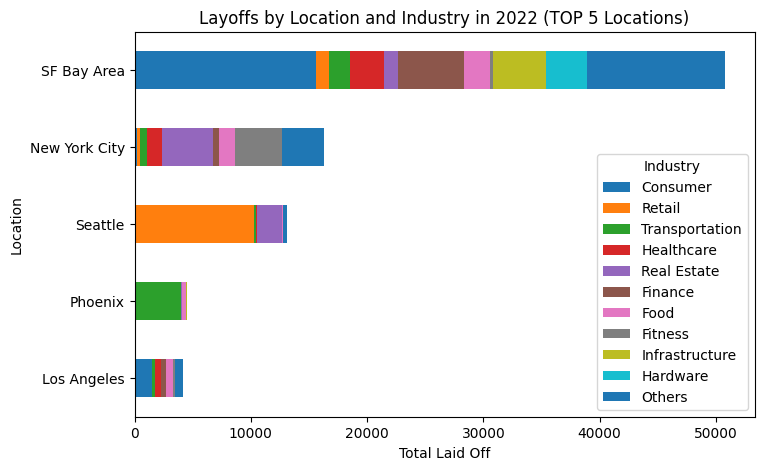

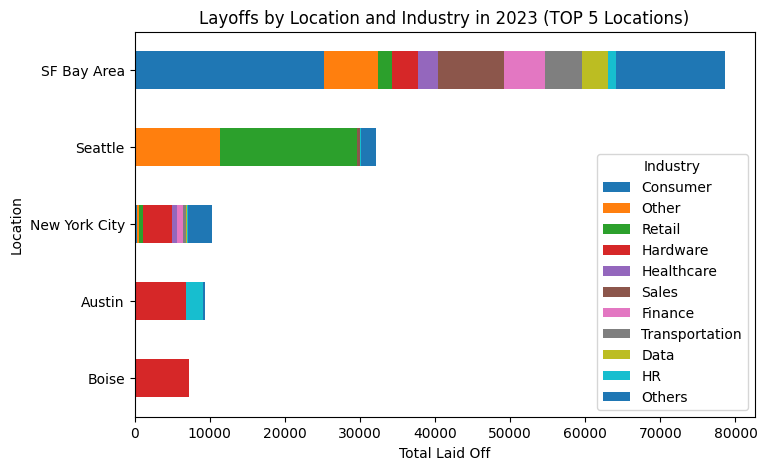

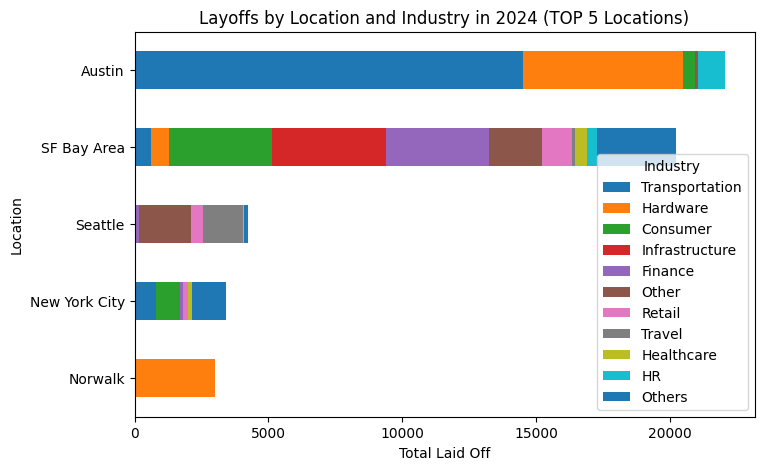

In [34]:
# Extract the year from the date column
us_layoffs['year'] = pd.to_datetime(us_layoffs['date']).dt.year

# Group the data by location and industry
us_grouped_entire = us_layoffs.groupby(['location', 'industry']).agg({'total_laid_off': 'sum'}).reset_index()

# Group the data by year, location, and industry, and sum the total_laid_off values
us_grouped_year = us_layoffs.groupby(['year', 'location', 'industry']).agg({'total_laid_off': 'sum'}).reset_index()

# Graph for entire data set by location stacked by industry
def plot_overall_sorted_stacked_bar_with_others(data, legend_max=10):
    pivot_df = data.pivot(index='location', columns='industry', values='total_laid_off').fillna(0)
    
    # Combine industries with fewer layoffs into "Others"
    sorted_columns = pivot_df.sum().sort_values(ascending=False)
    top_columns = sorted_columns.head(legend_max).index
    other_columns = sorted_columns.tail(len(sorted_columns) - legend_max).index
    
    pivot_df['Others'] = pivot_df[other_columns].sum(axis=1)
    pivot_df = pivot_df[top_columns.tolist() + ['Others']]
    
    # Sort locations by total layoffs
    pivot_df['Total'] = pivot_df.sum(axis=1)
    sorted_pivot_df = pivot_df.sort_values('Total', ascending=False).head(10).drop(columns='Total')
    
    sorted_pivot_df.plot(kind='barh', stacked=True, figsize=(10, 6))
    plt.title('Layoffs by Location and Industry in U.S. (Top 10 Locations)')
    plt.xlabel('Total Laid Off')
    plt.ylabel('Location')
    plt.legend(title='Industry', loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize='small')
    plt.gca().invert_yaxis()
    plt.show()
# Plot the graph for the entire dataset by location stacked by industry
plot_overall_sorted_stacked_bar_with_others(us_grouped_entire)

# Define a function to plot stacked bar graphs
def plot_top5_sorted_stacked_bar(data, year, legend_max=10):
    year_data = data[data['year'] == year]
    pivot_df = year_data.pivot(index='location', columns='industry', values='total_laid_off').fillna(0)

    # Combine industries with fewer layoffs into "Others"
    sorted_columns = pivot_df.sum().sort_values(ascending=False)
    top_columns = sorted_columns.head(legend_max).index
    other_columns = sorted_columns.tail(len(sorted_columns) - legend_max).index    
    pivot_df['Others'] = pivot_df[other_columns].sum(axis=1)
    pivot_df = pivot_df[top_columns.tolist() + ['Others']]

    # Sort locations by total layoffs    
    pivot_df['Total'] = pivot_df.sum(axis=1)
    sorted_pivot_df = pivot_df.sort_values('Total', ascending=False).head(5).drop(columns='Total')
    sorted_pivot_df.plot(kind='barh', stacked=True, figsize=(8, 5))
    plt.title(f'Layoffs by Location and Industry in {year} (TOP 5 Locations)')
    plt.xlabel('Total Laid Off')
    plt.ylabel('Location')
    plt.legend(title='Industry', loc='lower right')
    plt.gca().invert_yaxis()
    plt.show()

years = us_grouped_year['year'].unique()

# Plot sorted stacked bar graphs for each year from 2021 to 2024
for year in years:
    plot_top5_sorted_stacked_bar(us_grouped_year, year)

In [35]:
#------ Alexa
usa_lay_industry_highest = usa_lay_ind_summary.sort_values(by="Total Layoffs", ascending = False)
usa_lay_industry_highest.head(30)
print(usa_lay_industry_highest)

                Total Layoffs  Average Layoffs  Median Layoffs
industry                                                      
Consumer                57220           615.27            95.0
Retail                  49887           509.05           100.0
Transportation          42675           479.49           120.0
Hardware                36210          1341.11           320.0
Other                   32819           368.75           112.0
Finance                 24641           147.55            75.0
Healthcare              22237           156.60            90.0
Real Estate             16141           240.91           100.0
Infrastructure          14711           459.72            77.5
Sales                   14538           415.37            80.0
Food                    14461           237.07           100.0
Travel                  11691           285.15           109.0
Security                 8402           135.52            95.0
Data                     8177           138.59         

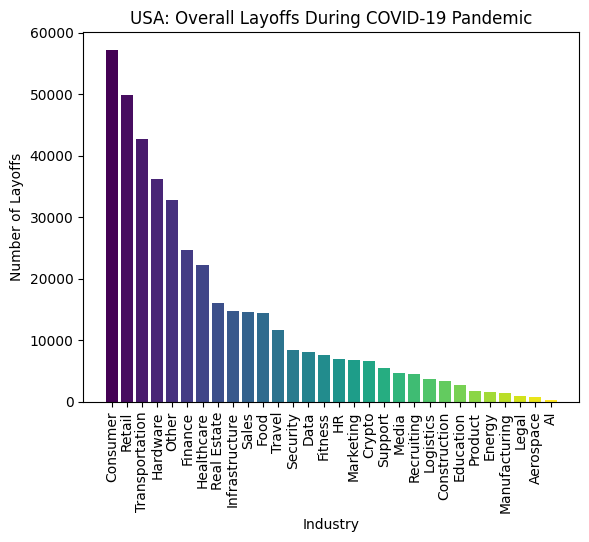

In [36]:
total_layoffs = pd.DataFrame(usa_lay_industry_highest["Total Layoffs"])
#industry_category = usa_lay_industry_highest["industry"]

#colors = plt.cm.tab10.colors
#fig, ax= plt.subplots()
#bars = ax.bar
#ax = total_layoffs.plot(kind="bar",color=colors,legend=False)

#plt.bar(total_layoffs,color=colors)

# Generate a colormap with enough colors 
colormap = plt.cm.viridis 

# Normalize color range 
norm = plt.Normalize(vmin=0, vmax=len(total_layoffs) - 1) 
# Create bar plot with automatic colors 
fig, ax = plt.subplots() 
bars = ax.bar(total_layoffs.index, total_layoffs["Total Layoffs"], color=colormap(norm(range(len(total_layoffs)))))

plt.xlabel('Industry')
plt.ylabel('Number of Layoffs')
plt.title('USA: Overall Layoffs During COVID-19 Pandemic')

plt.xticks(rotation=90)

plt.show()

In [37]:
total_layoffs.columns

Index(['Total Layoffs'], dtype='object')

In [38]:
total_layoffs.index.unique()
unique_industries = total_layoffs.index.unique()

In [39]:
industry_date = usa_lay_date_sumary.sort_values(by="Total Layoffs", ascending = False)
industry_date.head(10)

Total Layoffs  Average Layoffs  Median Layoffs
date    industry                                                      
2022-11 Consumer                15215          3043.00           400.0
2024-04 Transportation          14600          4866.67           500.0
2023-01 Consumer                12239          2039.83            53.0
        Other                   11372           947.67           107.5
        Retail                  11015          1223.89           150.0
2023-03 Consumer                10780          5390.00          5390.0
2023-01 Hardware                10343          2585.75          2600.0
2022-11 Retail                  10090          5045.00          5045.0
2023-03 Retail                   9391          1565.17           100.0
2023-02 Hardware                 9050          4525.00          4525.0

In [40]:
usa_lay_industry_highest_head = usa_lay_ind_summary.sort_values(by="Total Layoffs", ascending = False)
usa_lay_industry_highest_head.head(5)

,Total Layoffs,Average Layoffs,Median Layoffs
industry,,,
Consumer,57220,615.27,95.0
Retail,49887,509.05,100.0
Transportation,42675,479.49,120.0
Hardware,36210,1341.11,320.0
Other,32819,368.75,112.0


In [41]:
usa_lay_industry_tail = usa_lay_ind_summary.sort_values(by="Total Layoffs", ascending = False)
usa_lay_industry_tail.tail(5)

,Total Layoffs,Average Layoffs,Median Layoffs
industry,,,
Energy,1647,183.00,154.0
Manufacturing,1512,168.00,108.0
Legal,906,90.60,87.5
Aerospace,737,81.89,75.0
AI,242,60.50,40.0


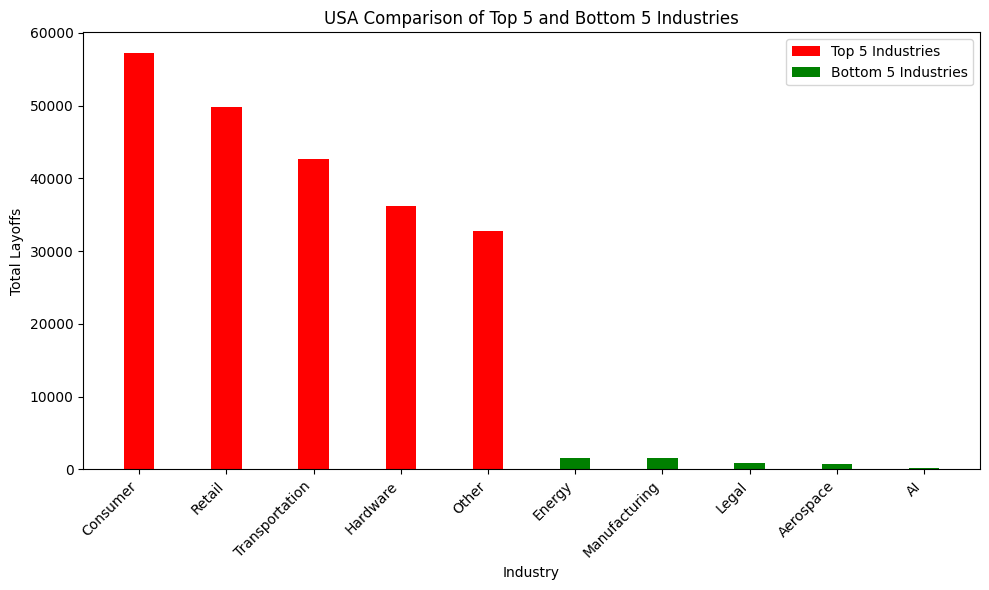

In [42]:
# Example data (replace with your actual data)
usa_lay_ind_summary = {
    'Industry': ['Consumer', 'Retail', 'Transportation', 'Hardware', 'Other', 'Energy', 'Manufacturing', 'Legal', 'Aerospace', 'AI'],
    'Total Layoffs': [57220, 49887, 42675, 36210, 32819, 1647, 1512, 906, 737, 242]
}

# Convert to DataFrame
usa_lay_ind_df = pd.DataFrame(usa_lay_ind_summary)

# Sort data to get top 5 and bottom 5 industries
usa_lay_industry_highest_head = usa_lay_ind_df.sort_values(by="Total Layoffs", ascending=False).head(5)
usa_lay_industry_tail = usa_lay_ind_df.sort_values(by="Total Layoffs", ascending=False).tail(5)

# Extracting data for plotting
highest_head_labels = usa_lay_industry_highest_head['Industry']
highest_head_values = usa_lay_industry_highest_head['Total Layoffs']

tail_labels = usa_lay_industry_tail['Industry']
tail_values = usa_lay_industry_tail['Total Layoffs']

# Combine all labels for x-axis
combined_labels = highest_head_labels.tolist() + tail_labels.tolist()

# Plotting the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(combined_labels))

bars1 = ax.bar(index[:5], highest_head_values, bar_width, label='Top 5 Industries', color='red')
bars2 = ax.bar(index[5:], tail_values, bar_width, label='Bottom 5 Industries', color='green')

ax.set_xlabel('Industry')
ax.set_ylabel('Total Layoffs')
ax.set_title('USA Comparison of Top 5 and Bottom 5 Industries')
ax.set_xticks(index)
ax.set_xticklabels(combined_labels, rotation=45, ha='right')

ax.legend()

plt.tight_layout()
plt.show()

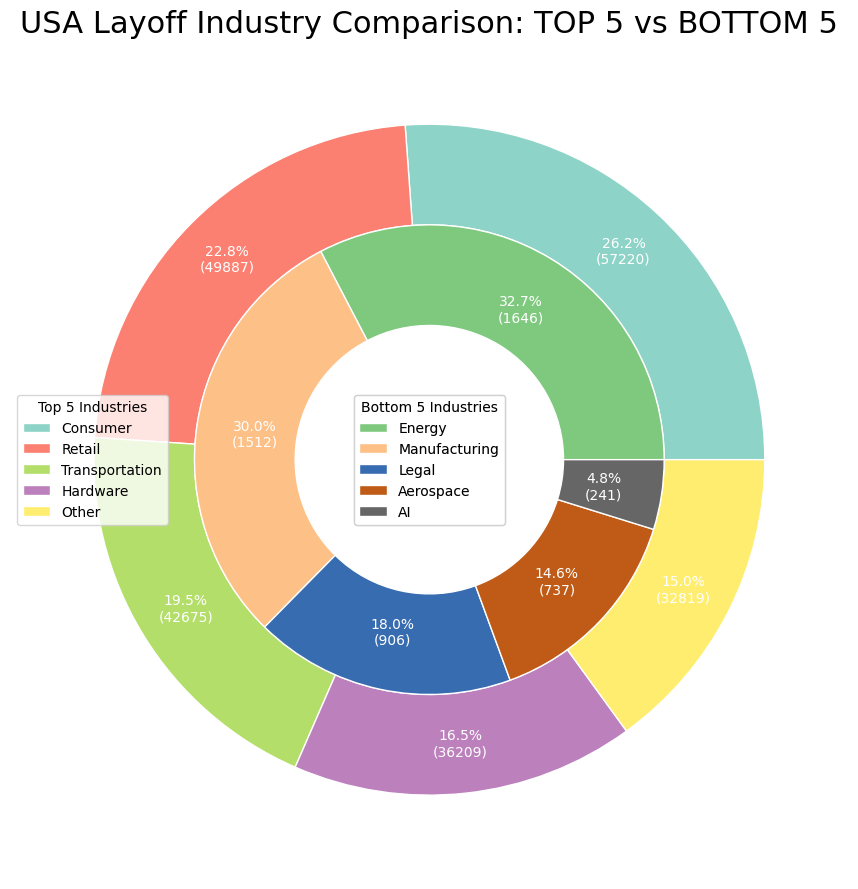

In [43]:

# data
usa_lay_industry_highest_head = {
    'Industry': ['Consumer', 'Retail', 'Transportation', 'Hardware', 'Other'],
    'Total Layoffs': [57220, 49887, 42675, 36210, 32819]
}

usa_lay_industry_tail = {
    'Industry': ['Energy', 'Manufacturing', 'Legal', 'Aerospace', 'AI'],
    'Total Layoffs': [1647, 1512, 906, 737, 242]
}

# Extracting data
highest_head_labels = usa_lay_industry_highest_head['Industry']
highest_head_values = usa_lay_industry_highest_head['Total Layoffs']

tail_labels = usa_lay_industry_tail['Industry']
tail_values = usa_lay_industry_tail['Total Layoffs']

# Creating the pie chart
fig, ax = plt.subplots(figsize=(13, 9))  # Adjust figsize as needed

# Pie chart parameters
size = 0.3

# Set custom colors for outer pie (highest head)
outer_colors = plt.cm.Set3(np.linspace(0, 1, len(highest_head_labels)))

# Set custom colors for inner pie (tail)
inner_colors = plt.cm.Accent(np.linspace(0, 1, len(tail_labels)))

# Outer pie (highest head)
wedges1, texts1, autotexts1 = ax.pie(highest_head_values, radius=1, colors=outer_colors,
                                     wedgeprops=dict(width=size, edgecolor='w'), autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100.*np.sum(highest_head_values))})',
                                     pctdistance=0.85, textprops=dict(color='w'))

# Inner pie (tail)
wedges2, texts2, autotexts2 = ax.pie(tail_values, radius=1-size, colors=inner_colors,
                                     wedgeprops=dict(width=size, edgecolor='w'), autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100.*np.sum(tail_values))})',
                                     pctdistance=0.75, textprops=dict(color='w'))

# Create legends with titles for each category
legend1 = ax.legend(wedges1, highest_head_labels, title="Top 5 Industries", loc='center left')
legend2 = ax.legend(wedges2, tail_labels, title="Bottom 5 Industries", loc='center')

# Adjust layout to accommodate both legends
ax.add_artist(legend1)
ax.add_artist(legend2)

# Set title and equal aspect ratio
ax.set_title('USA Layoff Industry Comparison: TOP 5 vs BOTTOM 5', fontsize=22)

ax.set(aspect="equal")

plt.tight_layout()  # Adjust spacing automatically

plt.show()

In [44]:
# -------- Jeniffer
correlation = layoffs_data_df[["industry","total_laid_off","date"]]
display(correlation)

,industry,total_laid_off,date
0,Travel,73.0,2024-05-01
1,Sales,15.0,2024-05-01
3,Transportation,400.0,2024-05-01
4,Marketing,105.0,2024-05-01
5,Education,300.0,2024-05-01
...,...,...,...
3619,Support,16.0,2020-03-01
3621,Transportation,8.0,2020-03-01
3622,Consumer,6.0,2020-03-01
3623,Retail,20.0,2020-03-01


In [45]:
total_laid_off_df = layoffs_data_df[["total_laid_off"]].copy()
display(total_laid_off_df)

,total_laid_off
0,73.0
1,15.0
3,400.0
4,105.0
5,300.0
...,...
3619,16.0
3621,8.0
3622,6.0
3623,20.0


In [46]:
#define dataframes
correlation = layoffs_data_df[["industry","total_laid_off","date"]]
total_laid_off_df = layoffs_data_df[["total_laid_off"]].copy()

# Define a function to map quarter numbers to labels
def map_quarter(quarter):
    quarter_labels = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
    return quarter_labels.get(quarter, 'Unknown')

# Convert 'date' column to datetime
correlation['date'] = pd.to_datetime(correlation['date'])

# Add a new 'year' column based on the 'date' column
correlation['year'] = correlation['date'].dt.year

# Create 'quarter' column by extracting quarter from the 'date' column
correlation['quarter'] = correlation['date'].dt.quarter

# Create 'quarter_year_label' column by combining 'quarter' and 'year'
correlation['quarter_year_label'] = correlation['quarter'].apply(lambda x: f"Q{x}") + ' ' + correlation['year'].astype(str)

# Sort the DataFrame by 'quarter_year_label'
correlation = correlation.sort_values(by='quarter_year_label', ascending=True)

# Display the updated DataFrame with the 'quarter_year_label' column and sorted by it
print(correlation)

            industry  total_laid_off       date  year  quarter  \
3624       Logistics            75.0 2020-03-01  2020        1   
3508       Logistics            65.0 2020-03-01  2020        1   
3507  Transportation           108.0 2020-03-01  2020        1   
3506        Consumer           194.0 2020-03-01  2020        1   
3505       Marketing           210.0 2020-03-01  2020        1   
...              ...             ...        ...   ...      ...   
433           Retail           180.0 2023-11-01  2023        4   
429           Crypto            50.0 2023-11-01  2023        4   
428        Aerospace           150.0 2023-11-01  2023        4   
455            Other           800.0 2023-11-01  2023        4   
471         Security            70.0 2023-10-01  2023        4   

     quarter_year_label  
3624            Q1 2020  
3508            Q1 2020  
3507            Q1 2020  
3506            Q1 2020  
3505            Q1 2020  
...                 ...  
433             Q4 2023  

In [47]:
correlation

,industry,total_laid_off,date,year,quarter,quarter_year_label
3624,Logistics,75.0,2020-03-01,2020,1,Q1 2020
3508,Logistics,65.0,2020-03-01,2020,1,Q1 2020
3507,Transportation,108.0,2020-03-01,2020,1,Q1 2020
3506,Consumer,194.0,2020-03-01,2020,1,Q1 2020
3505,Marketing,210.0,2020-03-01,2020,1,Q1 2020
...,...,...,...,...,...,...
433,Retail,180.0,2023-11-01,2023,4,Q4 2023
429,Crypto,50.0,2023-11-01,2023,4,Q4 2023
428,Aerospace,150.0,2023-11-01,2023,4,Q4 2023
455,Other,800.0,2023-11-01,2023,4,Q4 2023


In [48]:
# Define selected industries
selected_industries = ['Consumer', 'Retail', 'Transportation', 'Hardware', 'Other']
# Define Total Layoffs by Industry Quarter
Total_Layoffs_by_industry_quarter = correlation.groupby(['industry', 'quarter_year_label'], as_index=False)['total_laid_off'].sum()


# Filter the data for selected industries
selected_data = Total_Layoffs_by_industry_quarter[Total_Layoffs_by_industry_quarter['industry'].isin(selected_industries)]

# Calculate the total layoffs for each selected industry
total_layoffs_by_industry = selected_data.groupby('industry')['total_laid_off'].sum()

# Display the total layoffs for selected industries
print(total_layoffs_by_industry)

industry
Consumer          67575.0
Hardware          37750.0
Other             58261.0
Retail            70157.0
Transportation    59417.0
Name: total_laid_off, dtype: float64


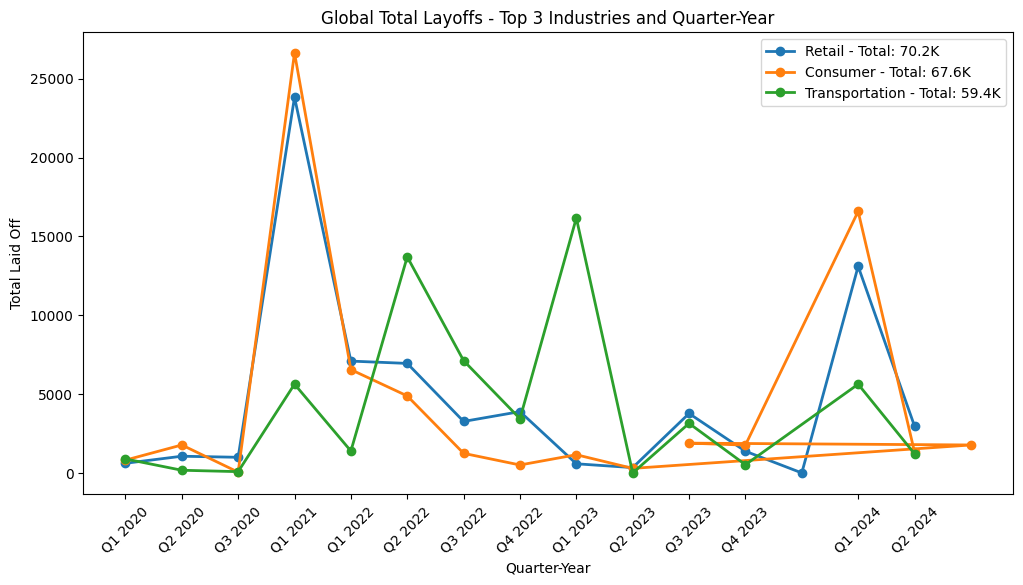

In [49]:

# Define selected industries
selected_industries = ['Consumer', 'Retail', 'Transportation']

# Create colormap and normalize
colormap = plt.cm.viridis
norm = plt.Normalize(vmin=0, vmax=len(total_laid_off_df) - 1)
sm = ScalarMappable(cmap='viridis', norm=norm)

# Create a line chart using plt.plot
plt.figure(figsize=(12, 6))
legend_data = []  # List to store legend data for sorting

# Iterate through each industry
for industry, data in Total_Layoffs_by_industry_quarter.groupby('industry'):
    if industry in selected_industries:
        total_layoffs = data['total_laid_off'].sum()
        formatted_total_layoffs = '{:.1f}K'.format(total_layoffs / 1000)  # Format total layoffs in thousands
        legend_data.append((industry, total_layoffs, formatted_total_layoffs, data))

# Sort the legend data by the total number of layoffs in descending order
legend_data_sorted = sorted(legend_data, key=lambda x: x[1], reverse=True)

# Plot each industry in sorted order
for industry, total_layoffs, formatted_total_layoffs, data in legend_data_sorted:
    plt.plot(data['quarter_year_label'], data['total_laid_off'], label=f"{industry} - Total: {formatted_total_layoffs}", marker='o', linewidth=2)

# Sort x-axis by calendar year quarter
plt.gca().set_xticks(data['quarter_year_label'].unique())
plt.gca().set_xticklabels(sorted(data['quarter_year_label'].unique(), key=lambda x: (int(x.split()[1]), int(x.split()[0][1:]))))

plt.xlabel('Quarter-Year')
plt.ylabel('Total Laid Off')
plt.title('Global Total Layoffs - Top 3 Industries and Quarter-Year')
plt.xticks(rotation=45)

# Create the legend with handles and labels in sorted order
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels)
plt.show()

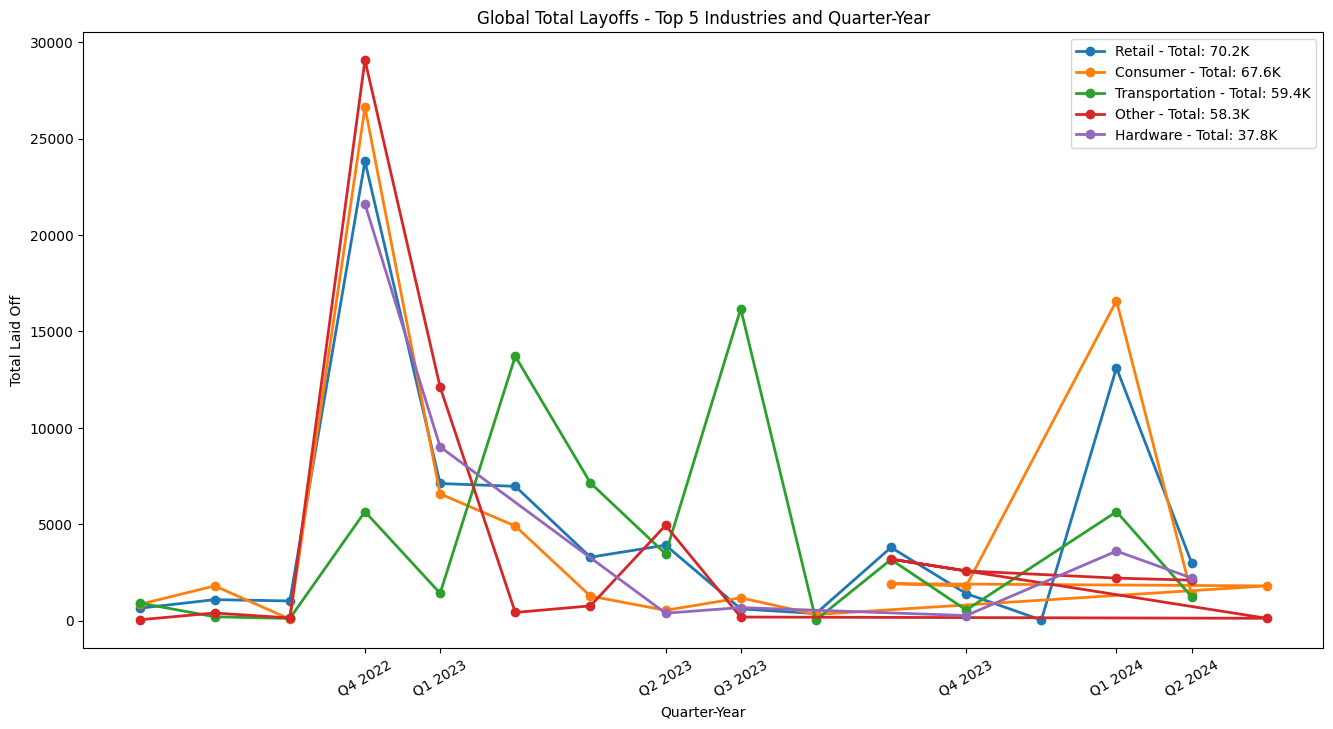

In [50]:
# Define selected industries
selected_industries = ['Consumer', 'Retail', 'Transportation', 'Hardware', 'Other']

# Create colormap and normalize
colormap = plt.cm.viridis
norm = plt.Normalize(vmin=0, vmax=len(total_laid_off_df) - 1)
sm = ScalarMappable(cmap='viridis', norm=norm)

# Create a line chart using plt.plot
plt.figure(figsize=(16, 8))  # Increase figure size
legend_data = []  # List to store legend data for sorting

# Iterate through each industry
for industry, data in Total_Layoffs_by_industry_quarter.groupby('industry'):
    if industry in selected_industries:
        total_layoffs = data['total_laid_off'].sum()
        formatted_total_layoffs = '{:.1f}K'.format(total_layoffs / 1000)  # Format total layoffs in thousands
        legend_data.append((industry, total_layoffs, formatted_total_layoffs, data))

# Sort the legend data by the total number of layoffs in descending order
legend_data_sorted = sorted(legend_data, key=lambda x: x[1], reverse=True)

# Plot each industry in sorted order
for industry, total_layoffs, formatted_total_layoffs, data in legend_data_sorted:
    plt.plot(data['quarter_year_label'], data['total_laid_off'], label=f"{industry} - Total: {formatted_total_layoffs}", marker='o', linewidth=2)

# Sort x-axis by calendar year quarter
plt.gca().set_xticks(data['quarter_year_label'].unique())
plt.gca().set_xticklabels(sorted(data['quarter_year_label'].unique(), key=lambda x: (int(x.split()[1]), int(x.split()[0][1:]))))

plt.xlabel('Quarter-Year')
plt.ylabel('Total Laid Off')
plt.title('Global Total Layoffs - Top 5 Industries and Quarter-Year')
plt.xticks(rotation=30)  # Adjust rotation angle

# Create the legend with handles and labels in sorted order
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels)
plt.show()